In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pysindy as ps

# Lotka-Volterra equations
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]


# Model parameters
alpha = 1.0
beta = 0.5
delta = 0.5
gamma = 2.0

# Initial conditions
x0 = 2.0
y0 = 1.0

# Time span for integration
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Numerically solve the Lotka-Volterra equations
solution = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval, args=(alpha, beta, delta, gamma))

# Extract data
t_data = solution.t
x_data, y_data = solution.y

from pysindy import SINDy
from pysindy.optimizers import STLSQ

# Stack data for PySINDy
data = np.stack((x_data, y_data), axis=-1)
threshold = 0.05
# Define the SINDy model
sindy = SINDy(optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=2))

# Fit the model to the data
sindy.fit(data, t=t_data)

# Print the discovered equations
print("Discovered equations:")
for eq in sindy.equations():
    print(eq)


Discovered equations:
1.002 x0 + -0.501 x0 x1
-1.997 x1 + 0.500 x0 x1


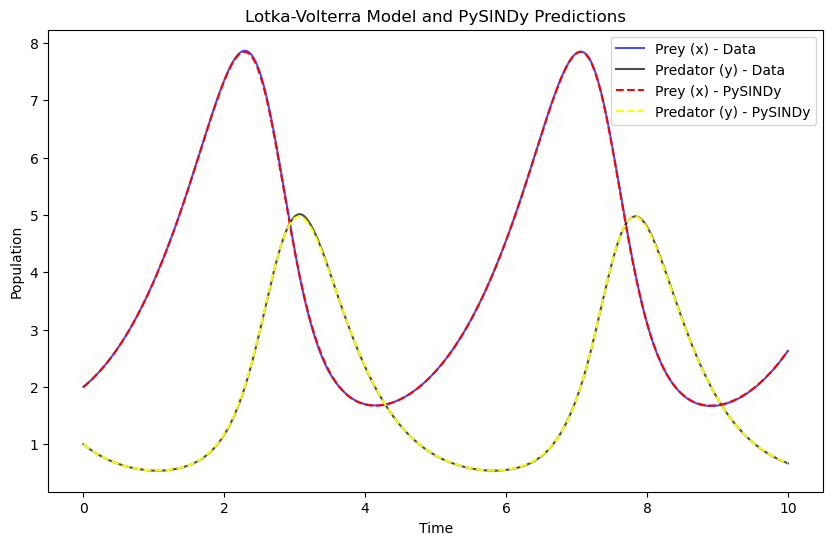

In [2]:
# Generate trajectories using the discovered equations
trajectories = sindy.simulate(data[0], t_data)

# Extract the predicted trajectories for x and y
x_pred = trajectories[:, 0]
y_pred = trajectories[:, 1]


# Plot the original data and the predicted trajectories
plt.figure(figsize=(10, 6))
plt.plot(t_data, x_data, label='Prey (x) - Data', color='blue', alpha=0.7)
plt.plot(t_data, y_data, label='Predator (y) - Data', color='black', alpha=0.7)
plt.plot(t_data, x_pred, '--', label='Prey (x) - PySINDy', color='red')
plt.plot(t_data, y_pred, '--', label='Predator (y) - PySINDy', color='yellow')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Lotka-Volterra Model and PySINDy Predictions')
plt.show()


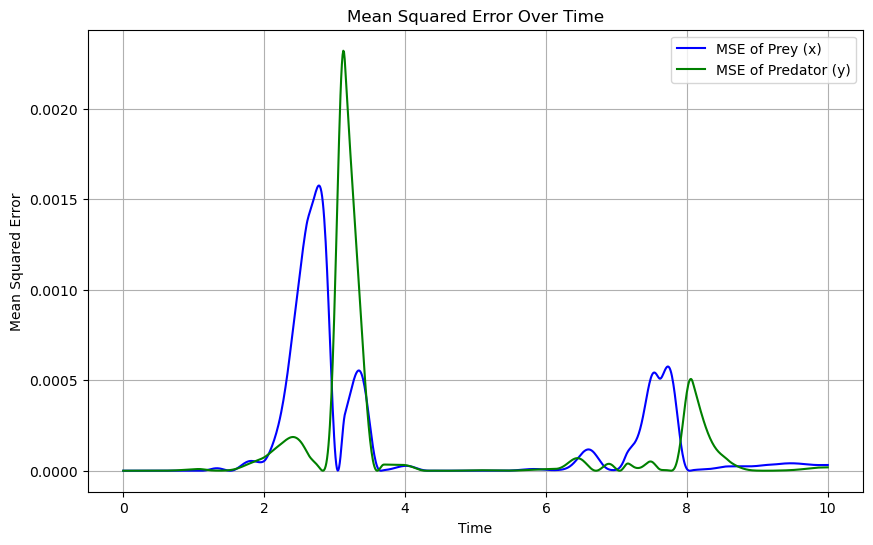

In [3]:
MSE_x = (x_pred-x_data)**2 
MSE_y = (y_pred-y_data)**2

plt.figure(figsize=(10, 6))

plt.plot(t_data, MSE_x, label='MSE of Prey (x)', color='blue')
plt.plot(t_data, MSE_y, label='MSE of Predator (y)',color='green')

plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Over Time')
plt.legend()
plt.grid(True)
plt.show()

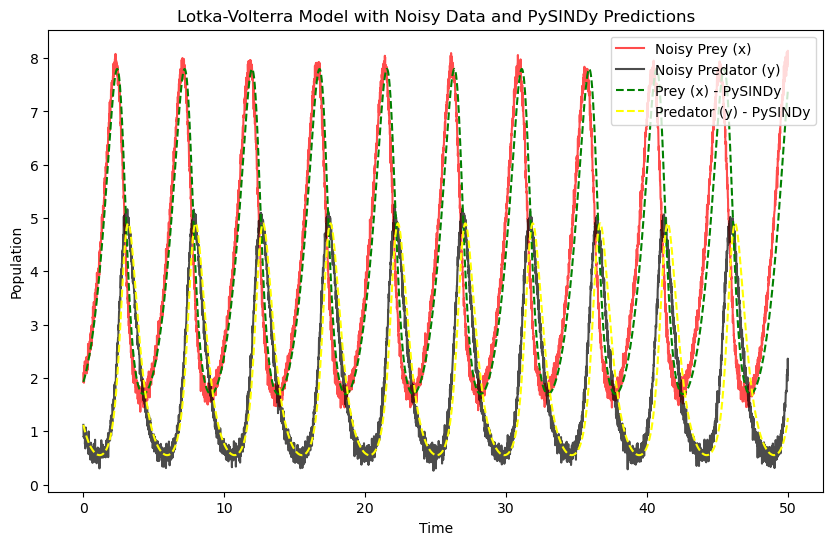

In [4]:
# Time span for integration (extended)
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Numerically solve the Lotka-Volterra equations
solution = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval, args=(alpha, beta, delta, gamma))

# Extract data
t_data = solution.t
x_data, y_data = solution.y

# Add noise to the data
noise_level = 0.1
x_noisy_data = x_data + np.random.normal(0, noise_level, size=x_data.shape)
y_noisy_data = y_data + np.random.normal(0, noise_level, size=y_data.shape)

# Create the data matrix for PySINDy
data_noisy = np.array([x_noisy_data, y_noisy_data]).T

# Initialize PySINDy
sindy = ps.SINDy(feature_names=['x', 'y'], t_default=1)

# Fit the model
sindy.fit(data_noisy, t=t_data)

# Generate trajectories using the discovered equations
trajectories = sindy.simulate(data_noisy[0], t_data)

# Extract the predicted trajectories for x and y
x_pred = trajectories[:, 0]
y_pred = trajectories[:, 1]

# Plot the original data and the predicted trajectories
plt.figure(figsize=(10, 6))
plt.plot(t_data, x_noisy_data, label='Noisy Prey (x)', color='red', alpha=0.7)
plt.plot(t_data, y_noisy_data, label='Noisy Predator (y)', color='black', alpha=0.7)
plt.plot(t_data, x_pred, '--', label='Prey (x) - PySINDy', color='green')
plt.plot(t_data, y_pred, '--', label='Predator (y) - PySINDy', color='yellow')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Lotka-Volterra Model with Noisy Data and PySINDy Predictions')
plt.show()

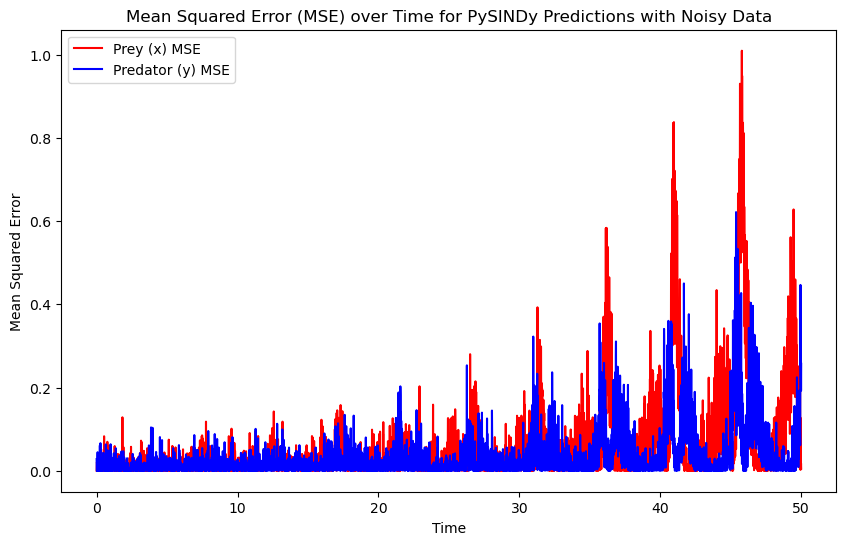

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pysindy as ps
from sklearn.metrics import mean_squared_error

# Lotka-Volterra equations
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Model parameters
alpha = 1.0
beta = 0.5
delta = 0.5
gamma = 2.0

# Initial conditions
x0 = 2.0
y0 = 1.0

# Time span for integration (extended)
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Numerically solve the Lotka-Volterra equations
solution = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval, args=(alpha, beta, delta, gamma))

# Extract data
t_data = solution.t
x_data, y_data = solution.y

# Add noise to the data
noise_level = 0.1
x_noisy_data = x_data + np.random.normal(0, noise_level, size=t_eval.shape)
y_noisy_data = y_data + np.random.normal(0, noise_level, size=t_eval.shape)

# Create the data matrix for PySINDy
data_noisy = np.array([x_noisy_data, y_noisy_data]).T

# Initialize PySINDy
sindy = ps.SINDy(feature_names=['x', 'y'], t_default=1)

# Fit the model
sindy.fit(data_noisy, t=t_eval)

# Generate trajectories using the discovered equations
trajectories = sindy.simulate([x0, y0], t_eval)

# Extract the predicted trajectories for x and y
x_pred = trajectories[:, 0]
y_pred = trajectories[:, 1]

# Plot the loss curve (Mean Squared Error) over time
plt.figure(figsize=(10, 6))
plt.plot(t_eval, ((x_noisy_data - x_pred) ** 2), label='Prey (x) MSE', color='red')
plt.plot(t_eval, ((y_noisy_data - y_pred) ** 2), label='Predator (y) MSE', color='blue')
plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Mean Squared Error (MSE) over Time for PySINDy Predictions with Noisy Data')
plt.show()
